# Exploring temperatures on the London Underground 🚇

Welcome to my analysis of the average monthly temperatures on Transport for London's (TfL)  underground trains! We all know how important it is to stay cool and comfortable on our commutes, and this project aims to shed light on just how crucial it is to monitor the temperature on these trains 🚇.

We'll be taking a closer look at how temperature affects both our comfort as passengers and the functioning of the trains themselves 🌡️. With extreme temperatures, passengers can run into some uncomfortable health issues and even potential delays and safety concerns.

That's why we're diving into the importance of monitoring the temperature and exploring the potential impact of climate change on it. By monitoring closely, TfL can proactively address the issue and ensure a safer and more comfortable journey for all 🛠️.

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import plotly.express as px
pd.set_option('display.max_rows', None)

In [267]:
df1.keys()

Index(['Year', 'Month', 'Bakerloo', 'Central', 'Jubilee', 'Northern',
       'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Subsurface_lines'],
      dtype='object')

In [268]:
df1 = pd.read_csv('https://data.london.gov.uk/download/london-underground-average-monthly-temperatures/531e627d-5779-4ae1-bf72-ffa981e13d6e/lu-average-monthly-temperatures_2021-2022%20GLA%20data%20store%20updates.csv')
df1.drop(columns=['Unnamed: 10', 'Unnamed: 11'], inplace=True)
df1.rename(columns={"Sub-surface_lines": "Subsurface_lines"}, inplace=True)
df1

,Year,Month,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Subsurface_lines
0,2020,January,25.38,23.81,19.73,23.36,21.53,25.92,19.06,14.29
1,2020,February,24.97,23.88,20.21,23.19,21.25,26.05,18.93,14.01
2,2020,March,24.81,23.40,19.33,22.57,21.05,24.41,18.53,14.08
3,2020,April,25.23,22.91,19.58,22.62,20.99,22.44,18.68,16.38
4,2020,May,27.12,24.17,21.28,23.75,22.35,23.02,19.31,19.42
5,2020,June,28.83,26.70,23.58,25.65,24.70,26.39,20.55,22.02
6,2020,July,29.96,28.62,24.86,26.79,25.89,27.82,21.14,23.31
7,2020,August,31.18,30.50,26.18,28.21,27.35,29.64,22.05,24.94
8,2020,September,30.41,29.14,24.16,27.48,26.29,29.11,20.60,22.33
9,2020,October,27.71,26.38,21.20,25.55,23.76,27.88,18.10,17.64


In [269]:
# Loading in TFL line Temperatures 2013 to 2020
df2 = pd.read_csv('https://data.london.gov.uk/download/london-underground-average-monthly-temperatures/b01c7853-fff2-4781-9755-9b5e1404d78c/lu-average-monthly-temperatures.csv')
df2.rename(columns={"Sub-surface_lines": "Subsurface_lines"}, inplace=True)
df2 = df2.iloc[:-12]
df2

,Year,Month,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Subsurface_lines
0,2013,January,21.70,21.00,16.40,19.50,19.30,18.40,16.40,11.90
1,2013,February,21.50,21.00,17.90,19.80,19.00,18.30,17.10,11.30
2,2013,March,21.70,20.90,18.20,20.00,18.70,17.70,16.70,11.40
3,2013,April,23.40,22.80,20.30,21.40,20.30,19.60,18.40,15.30
4,2013,May,25.40,24.70,21.90,22.90,22.40,21.50,20.30,18.30
5,2013,June,27.00,26.70,23.10,23.70,24.20,23.30,22.10,21.30
6,2013,July,29.70,30.00,26.30,25.90,27.50,26.50,24.90,26.30
7,2013,August,29.90,30.00,26.10,26.20,27.40,26.60,25.10,25.30
8,2013,September,28.90,28.20,24.50,25.10,26.10,25.10,23.80,22.40
9,2013,October,27.90,27.10,23.10,24.20,25.10,24.10,23.10,20.40


In [270]:
df = pd.concat([df2, 
                df1], ignore_index=True)
df

,Year,Month,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Subsurface_lines
0,2013,January,21.70,21.00,16.40,19.50,19.30,18.40,16.40,11.90
1,2013,February,21.50,21.00,17.90,19.80,19.00,18.30,17.10,11.30
2,2013,March,21.70,20.90,18.20,20.00,18.70,17.70,16.70,11.40
3,2013,April,23.40,22.80,20.30,21.40,20.30,19.60,18.40,15.30
4,2013,May,25.40,24.70,21.90,22.90,22.40,21.50,20.30,18.30
5,2013,June,27.00,26.70,23.10,23.70,24.20,23.30,22.10,21.30
6,2013,July,29.70,30.00,26.30,25.90,27.50,26.50,24.90,26.30
7,2013,August,29.90,30.00,26.10,26.20,27.40,26.60,25.10,25.30
8,2013,September,28.90,28.20,24.50,25.10,26.10,25.10,23.80,22.40
9,2013,October,27.90,27.10,23.10,24.20,25.10,24.10,23.10,20.40


In [271]:
# Creating a column to combine the Month and Year columns
df["Period"] = df["Month"] + ' ' + df["Year"].astype(str)
df.sample(12)

,Year,Month,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Subsurface_lines,Period
2,2013,March,21.70,20.90,18.20,20.00,18.70,17.70,16.70,11.40,March 2013
57,2017,October,28.36,27.87,24.33,26.37,24.67,28.04,23.50,23.18,October 2017
104,2021,September,29.09,29.32,24.12,27.49,26.10,29.94,21.49,23.56,September 2021
11,2013,December,23.90,23.10,19.70,21.20,21.00,20.00,19.40,14.70,December 2013
111,2022,April,24.56,24.81,20.73,22.68,22.20,26.18,18.69,17.52,April 2022
65,2018,June,29.80,29.51,25.84,27.19,26.28,27.69,24.50,24.43,June 2018
18,2014,July,29.90,30.50,26.30,27.10,27.80,27.20,25.80,26.20,July 2014
95,2020,December,24.11,23.42,18.31,22.56,20.43,24.11,15.37,13.36,December 2020
45,2016,October,28.69,27.50,23.58,26.31,24.59,25.81,23.46,19.42,October 2016
14,2014,March,23.90,23.70,19.50,21.10,21.50,20.60,20.10,16.70,March 2014


## Average Temperature in London

To establish what relationship (if any) that ambient conditions have on average temperature in tube carriages, we will use detailed data on London weather for the given time period. The dataset used below is curated from [European Climate Assessment & Dataset](https://www.ecad.eu/dailydata/index.php) and is available on [Kaggle](https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data).

In [272]:
ldn_weather=pd.read_csv('data/london_weather.csv')
ldn_weather.drop(columns=['global_radiation', 'pressure', 'snow_depth'],
                 inplace=True)

In [273]:
ldn_weather['date']=pd.to_datetime(ldn_weather['date'], format='%Y%m%d')
# Using .to_datetime, we parse the dates into datetime in the format YYYY-mm-dd

In [274]:
ldn_weather["new_date"]=list(zip(ldn_weather.date.dt.year, ldn_weather.date.dt.month))
# Creates a tuple of the year and month of a given temperature record 

In [275]:
ldn_weather['Month']=list(ldn_weather.date.dt.month)
ldn_weather['Year']=list(ldn_weather.date.dt.year)
# Creates the columns 'Month' & 'Year' from the reparsed 'date' column
# It will become clear why we created these columns

In [276]:
ldn_weather.head()

,date,cloud_cover,sunshine,max_temp,mean_temp,min_temp,precipitation,new_date,Month,Year
0,1979-01-01,2.0,7.0,2.3,-4.1,-7.5,0.4,"(1979, 1)",1,1979
1,1979-01-02,6.0,1.7,1.6,-2.6,-7.5,0.0,"(1979, 1)",1,1979
2,1979-01-03,5.0,0.0,1.3,-2.8,-7.2,0.0,"(1979, 1)",1,1979
3,1979-01-04,8.0,0.0,-0.3,-2.6,-6.5,0.0,"(1979, 1)",1,1979
4,1979-01-05,6.0,2.0,5.6,-0.8,-1.4,0.0,"(1979, 1)",1,1979


In [277]:
ldn_weather.tail()

,date,cloud_cover,sunshine,max_temp,mean_temp,min_temp,precipitation,new_date,Month,Year
15336,2020-12-27,1.0,0.9,7.5,7.5,7.6,2.0,"(2020, 12)",12,2020
15337,2020-12-28,7.0,3.7,3.6,1.1,-1.3,0.2,"(2020, 12)",12,2020
15338,2020-12-29,7.0,0.0,4.1,2.6,1.1,0.0,"(2020, 12)",12,2020
15339,2020-12-30,6.0,0.4,5.6,2.7,-0.1,0.0,"(2020, 12)",12,2020
15340,2020-12-31,7.0,1.3,1.5,-0.8,-3.1,0.0,"(2020, 12)",12,2020


In [278]:
# To make the data more comparable to the TfL dataframe, we group all temperature data by 'new_date',
# the month and year and calculte the averages.
weather_grpd=ldn_weather.groupby(['new_date']).mean(numeric_only=True).reset_index()
weather_grpd.tail()

,new_date,cloud_cover,sunshine,max_temp,mean_temp,min_temp,precipitation,Month,Year
499,"(2020, 8)",5.000000,6.135484,25.200000,20.393333,15.738710,1.812903,8.0,2020.0
500,"(2020, 9)",4.200000,6.540000,21.693333,16.616667,11.580000,0.640000,9.0,2020.0
501,"(2020, 10)",5.774194,1.887097,14.970000,11.933333,9.038710,4.632258,10.0,2020.0
502,"(2020, 11)",5.933333,1.716667,12.636667,9.806667,7.026667,1.660000,11.0,2020.0
503,"(2020, 12)",5.466667,1.425806,8.325806,6.232258,4.187097,2.335484,12.0,2020.0


In [279]:
weather_grpd['Month'].replace({1: 'January',
                               2: 'February',
                               3: 'March',
                               4: 'April',
                               5: 'May',
                               6: 'June',
                               7: 'July',
                               8: 'August',
                               9: 'September',
                               10: 'October',
                               11: 'November',
                               12: 'December'},
                              inplace=True)
# Parsing the 'Month' column into actual month names

In [280]:
weather_grpd.head()

,new_date,cloud_cover,sunshine,max_temp,mean_temp,min_temp,precipitation,Month,Year
0,"(1979, 1)",5.724138,1.887097,4.116129,0.616129,-2.551613,1.932258,January,1979.0
1,"(1979, 2)",6.360000,1.889286,4.532143,2.042857,-0.428571,1.571429,February,1979.0
2,"(1979, 3)",5.967742,3.212903,9.238710,5.587097,1.993548,3.061290,March,1979.0
3,"(1979, 4)",6.133333,3.543333,12.520000,8.743333,4.810000,2.586667,April,1979.0
4,"(1979, 5)",5.290323,6.470968,16.206452,11.490323,7.151613,2.806452,May,1979.0


In [281]:
weather_grpd=weather_grpd[weather_grpd['Year'] > 2012] 
# Setting the weather data to align with the tfl temperature data available to us

In [282]:
weather_grpd.Year=weather_grpd.Year.astype(int)

In [283]:
weather_grpd.head()

,new_date,cloud_cover,sunshine,max_temp,mean_temp,min_temp,precipitation,Month,Year
408,"(2013, 1)",6.387097,1.112903,6.529032,4.296774,2.016129,1.616129,January,2013
409,"(2013, 2)",5.857143,2.317857,6.639286,3.953571,1.214286,1.171429,February,2013
410,"(2013, 3)",6.322581,2.009677,6.880645,4.074194,1.216129,1.703226,March,2013
411,"(2013, 4)",4.266667,5.426667,13.770000,9.090000,4.680000,1.133333,April,2013
412,"(2013, 5)",4.709677,5.267742,16.432258,12.074194,7.738710,1.348387,May,2013


In [284]:
weather_grpd["Period"] = weather_grpd["Month"] + ' ' + weather_grpd["Year"].astype(str)
weather_grpd.head()

,new_date,cloud_cover,sunshine,max_temp,mean_temp,min_temp,precipitation,Month,Year,Period
408,"(2013, 1)",6.387097,1.112903,6.529032,4.296774,2.016129,1.616129,January,2013,January 2013
409,"(2013, 2)",5.857143,2.317857,6.639286,3.953571,1.214286,1.171429,February,2013,February 2013
410,"(2013, 3)",6.322581,2.009677,6.880645,4.074194,1.216129,1.703226,March,2013,March 2013
411,"(2013, 4)",4.266667,5.426667,13.770000,9.090000,4.680000,1.133333,April,2013,April 2013
412,"(2013, 5)",4.709677,5.267742,16.432258,12.074194,7.738710,1.348387,May,2013,May 2013


In [285]:
px.line(weather_grpd, 
        y=weather_grpd['mean_temp'].round(2),
        x=weather_grpd['Month'],
        color=weather_grpd['Year'],
        markers=True, 
        width=960, 
        height=720)

### Observations
* Predictably, we see that the average monthly temperature in London is cyclical, peaking in July/August ☀️ and plateauing in January ☃️. 

In [286]:
df_merged=df.merge(weather_grpd.drop(columns=['Year', 
                                              'Month', 
                                              'new_date']), 
                   on='Period', 
                   how='outer')
# Merging the TfL dataset and London weather dataset to see what factors affect temperatures on trains.

In [287]:
df_merged.tail(12)

,Year,Month,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Subsurface_lines,Period,cloud_cover,sunshine,max_temp,mean_temp,min_temp,precipitation
108,2022,January,23.01,22.50,17.59,21.68,19.86,24.47,15.51,13.85,January 2022,NaN,NaN,NaN,NaN,NaN,NaN
109,2022,February,23.15,23.02,18.08,21.39,20.32,24.40,16.93,14.75,February 2022,NaN,NaN,NaN,NaN,NaN,NaN
110,2022,March,23.05,23.86,19.32,21.75,20.92,24.06,17.59,15.88,March 2022,NaN,NaN,NaN,NaN,NaN,NaN
111,2022,April,24.56,24.81,20.73,22.68,22.20,26.18,18.69,17.52,April 2022,NaN,NaN,NaN,NaN,NaN,NaN
112,2022,May,26.15,26.83,22.40,24.61,24.18,27.84,20.69,21.06,May 2022,NaN,NaN,NaN,NaN,NaN,NaN
113,2022,June,27.36,28.28,24.10,26.17,25.65,29.04,21.84,23.42,June 2022,NaN,NaN,NaN,NaN,NaN,NaN
114,2022,July,29.44,30.26,26.30,28.39,27.67,30.82,23.99,26.76,July 2022,NaN,NaN,NaN,NaN,NaN,NaN
115,2022,August,30.40,31.32,26.86,29.15,28.39,31.18,24.96,27.39,August 2022,NaN,NaN,NaN,NaN,NaN,NaN
116,2022,September,29.21,29.62,24.97,28.14,26.93,30.84,23.43,23.32,September 2022,NaN,NaN,NaN,NaN,NaN,NaN
117,2022,October,27.58,27.97,23.38,26.93,25.33,29.89,22.21,21.14,October 2022,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
# Grouping the Dataframe by Year, and finding the averages
df_byyears=df_merged.groupby('Year').max(numeric_only=True).reset_index()
df_byyears

,Year,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Subsurface_lines,cloud_cover,sunshine,max_temp,mean_temp,min_temp,precipitation
0,2013,29.90,30.00,26.30,26.20,27.50,26.60,25.10,26.30,6.387097,8.651613,27.393548,21.135484,15.241935,3.167742
1,2014,29.90,30.50,26.30,27.10,27.80,27.20,25.80,26.20,4.967742,7.948387,25.835484,20.383871,14.951613,5.238710
2,2015,29.78,29.81,26.17,27.76,26.22,26.35,25.22,24.70,6.466667,7.070000,23.183871,18.783871,14.074194,3.767742
3,2016,31.04,30.47,26.57,28.30,27.30,28.03,26.03,25.00,6.366667,6.496774,24.916129,19.687097,14.619355,3.113333
4,2017,30.87,30.61,26.56,28.15,27.18,28.54,25.53,24.67,6.428571,6.810000,23.900000,19.387097,14.925806,2.903226
5,2018,32.41,32.02,28.16,29.46,28.57,29.91,26.54,27.72,6.645161,8.790323,28.103226,22.309677,16.358065,2.619355
6,2019,31.75,30.80,26.49,29.18,28.04,30.19,25.31,25.91,5.903226,6.490323,25.574194,20.180645,14.909677,2.993548
7,2020,31.18,30.50,26.18,28.21,27.35,29.64,22.05,24.94,5.933333,10.667742,25.200000,20.393333,15.738710,4.632258
8,2021,29.09,29.32,24.70,27.49,26.22,29.94,21.56,24.10,NaN,NaN,NaN,NaN,NaN,NaN
9,2022,30.40,31.32,26.86,29.15,28.39,31.18,24.96,27.39,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
px.scatter(df_byyears,
           x="Year",
           y=["Bakerloo",
              "Central",
              "Jubilee",
              "Northern",
              "Piccadilly",
              "Victoria",
              "Waterloo_and_City",
              "Subsurface_lines"],
           color_discrete_map=
           {"Bakerloo": 'rgb(179,98,5)',
            "Central": 'rgb(227,13,23)',
            "Jubilee": 'rgb(160,165,169)',
            "Northern": 'rgb(0,0,0)',
            "Piccadilly": 'rgb(0,54,136)', 
            "Victoria": 'rgb(0,152,212)', 
            "Waterloo_and_City": 'rgb(149,205,186)', 
            "Subsurface_lines":'rgb(255,211,0)'},
           labels={"period": "Month & year",
                   "value": "Temperature (˚C)",
                   "variable": "Underground lines"
                  },
           trendline='lowess',
           title='Mean Temperature on TFL Underground lines'
          )

### Observations
* A reason for the significant drop in avg. temperature in 2020 is likely due to the reduced travel caused by COVID-19 restrictions resulting in less heat on trains.
* It is likely that changes to climate are impacting the temperatures experienced on trains.
* The Subsurface lines (Circle, District, Metropolitan, Hammersmith & City lines) are stocked by the 'S Stock' S7 & S8 trains which are air-conditioned throughout. The subsurface tunnels also allow the exhausted hot air to disperse.
* It seems that the avg. temperature of the Victoria line is going up by __0.72 degrees__ yearly! This is significantly higher than other deep-level tube lines. There seems to be no sufficient explanation for this. The Victoria line is also one of two lines [to be wholly-underground](https://www.mylondon.news/news/zone-1-news/london-underground-employee-explains-victoria-24708836) (the other being the Waterloo & City line) so one might postulate that trapped heat would have a hard time escaping and sink into the tunnel walls. 



Below I have attached a map of the TfL network with all tunnels shown:

<!-- 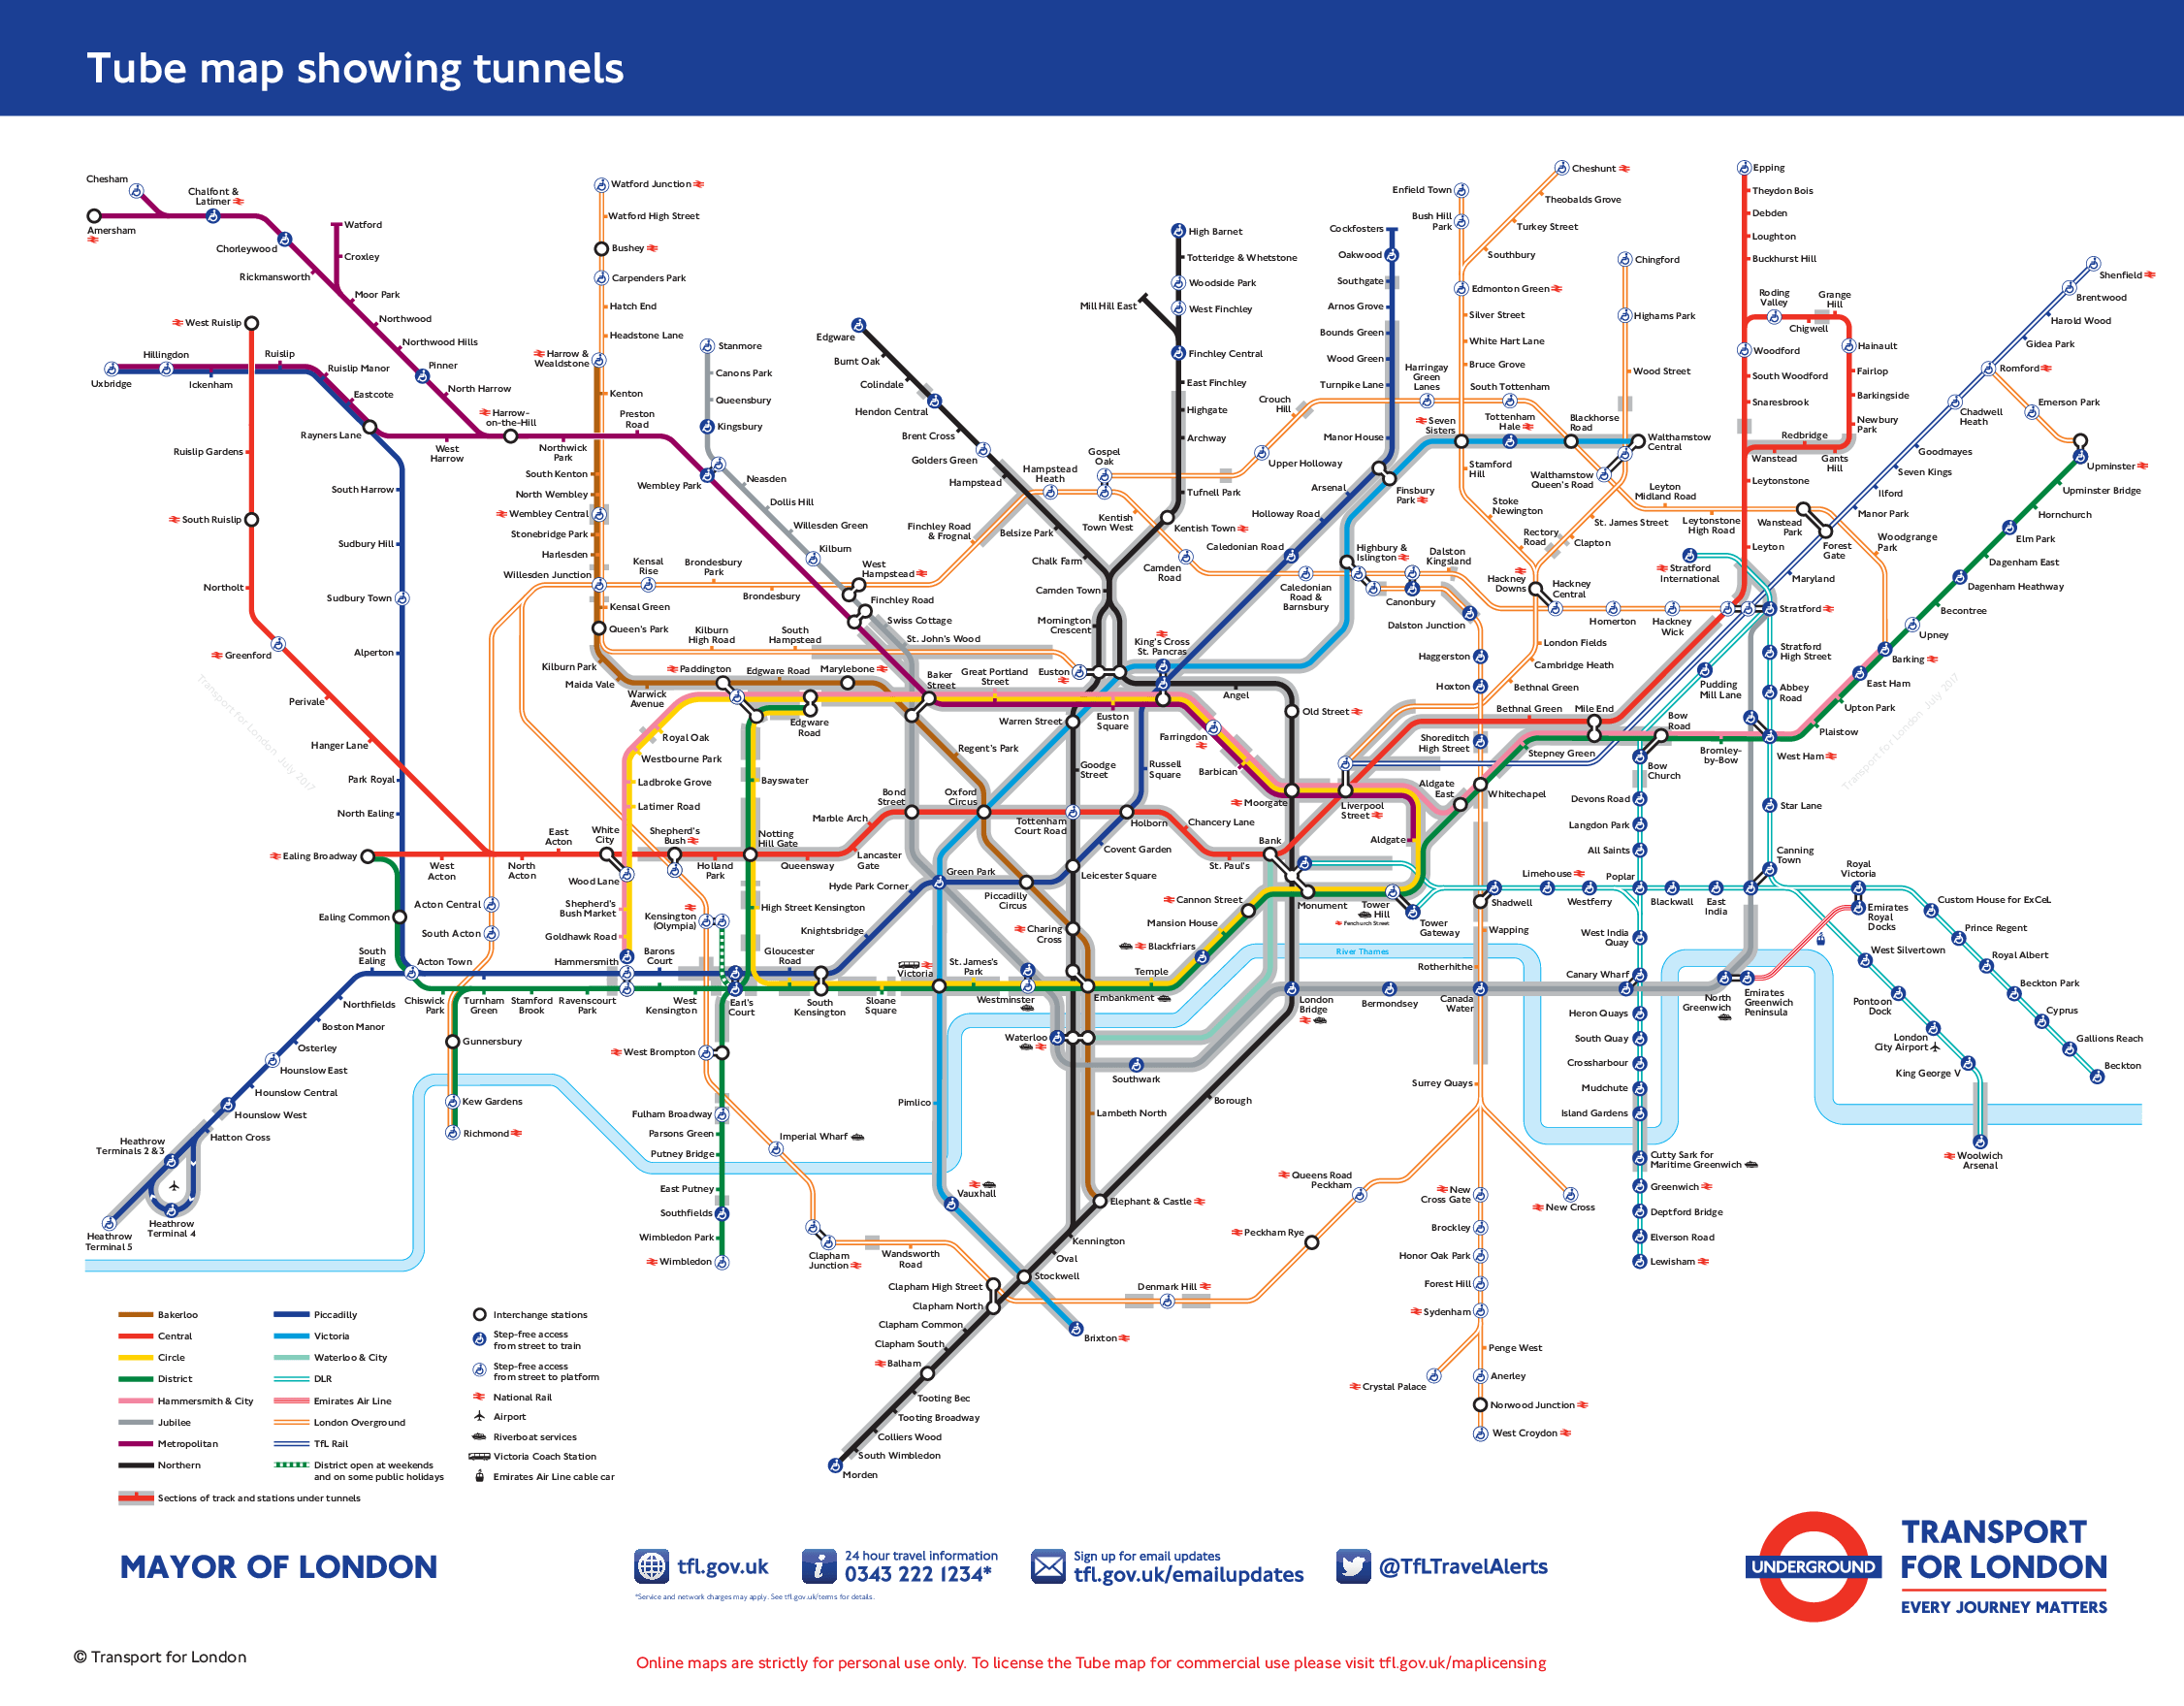 -->
![tube-map-with-tunnels-1.png](tube-map-with-tunnels-1.png)

### Limitations 
It's important to acknowledge the limitations of the data used in this analysis in order to have a better understanding of the results and conclusions drawn from it. Some of the limitations of the data used in this analysis of average temperature on TFL underground lines include:

* Data Availability: The availability of data is currently only from January 2013 to December 2020. Additionally, only London Underground lines are made available in this dataset, leaving out data from the London Overground & Elizabeth line (Formerly TFL Rail) for this period._‡_


* Data Size: The dataset as currently available is only monthly averages and does not go into more detail to know the temperatures on individual days of the month on trains. A more populated dataset would provide more information and allow for more detailed analysis.


* External Factors: External factors such as weather conditions, passenger density, and other variables may impact the temperature on TFL trains and are not captured in the data. For example, drastically reduced passenger ridership in 2020, resulting from the COVID-19 pandemic, likely contributes to lower temperatures.


By acknowledging these limitations, the results of the analysis can be properly contextualized and the validity of the conclusions can be better assessed.

_‡_ _As of publishing, I have filed a Freedom of Information request to TfL inquiring about this data and future updates to include 2021-2022 data. This notebook will be updated as that information is provided_. 


> **_UPDATE:_** 
The response to the Freedom of Information request was as follows: 
 
**We do not hold temperatures measurements for London Overground or the Elizabeth line. We no longer create temperature maps.**



## Can the weather tell us anything about the tube temperatures? 🌧️

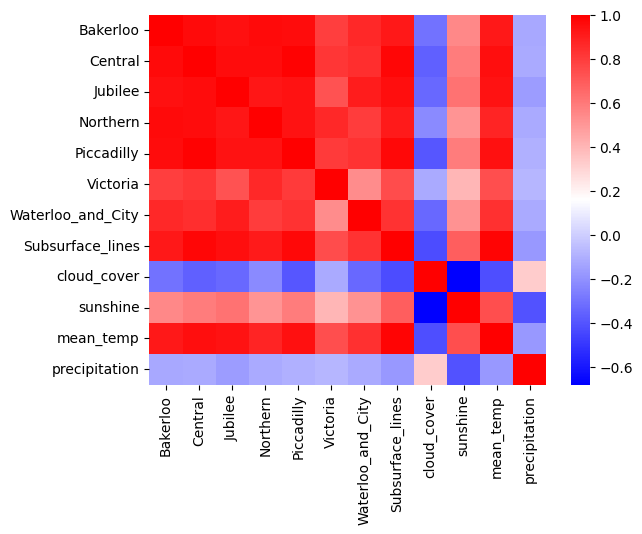

In [290]:
# To help with this, we can build a heatmap of correlations
correlation_matrix = df_merged.drop(columns=['Year', 
                                             'Month',   
                                             'max_temp', 
                                             'min_temp']).corr(numeric_only=True)
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, 
            xticklabels=column_names, 
            yticklabels=column_names,
            cmap= "bwr");

##### Observations
* The weather factors have particularly poor correlation to the underground temperatures, especially precipitation and cloud cover. 
* Sunshine has weak but noticeable correlation but is more indicative of ambient temperature so may not ultimately be useful. 

_Next we will find out how much ambient temperature impacts specific lines._

##### As seen in the chart above, the Subsurface line lines (Central, District, Metropolitan, Hammersmith & City lines) are significantly cooler 

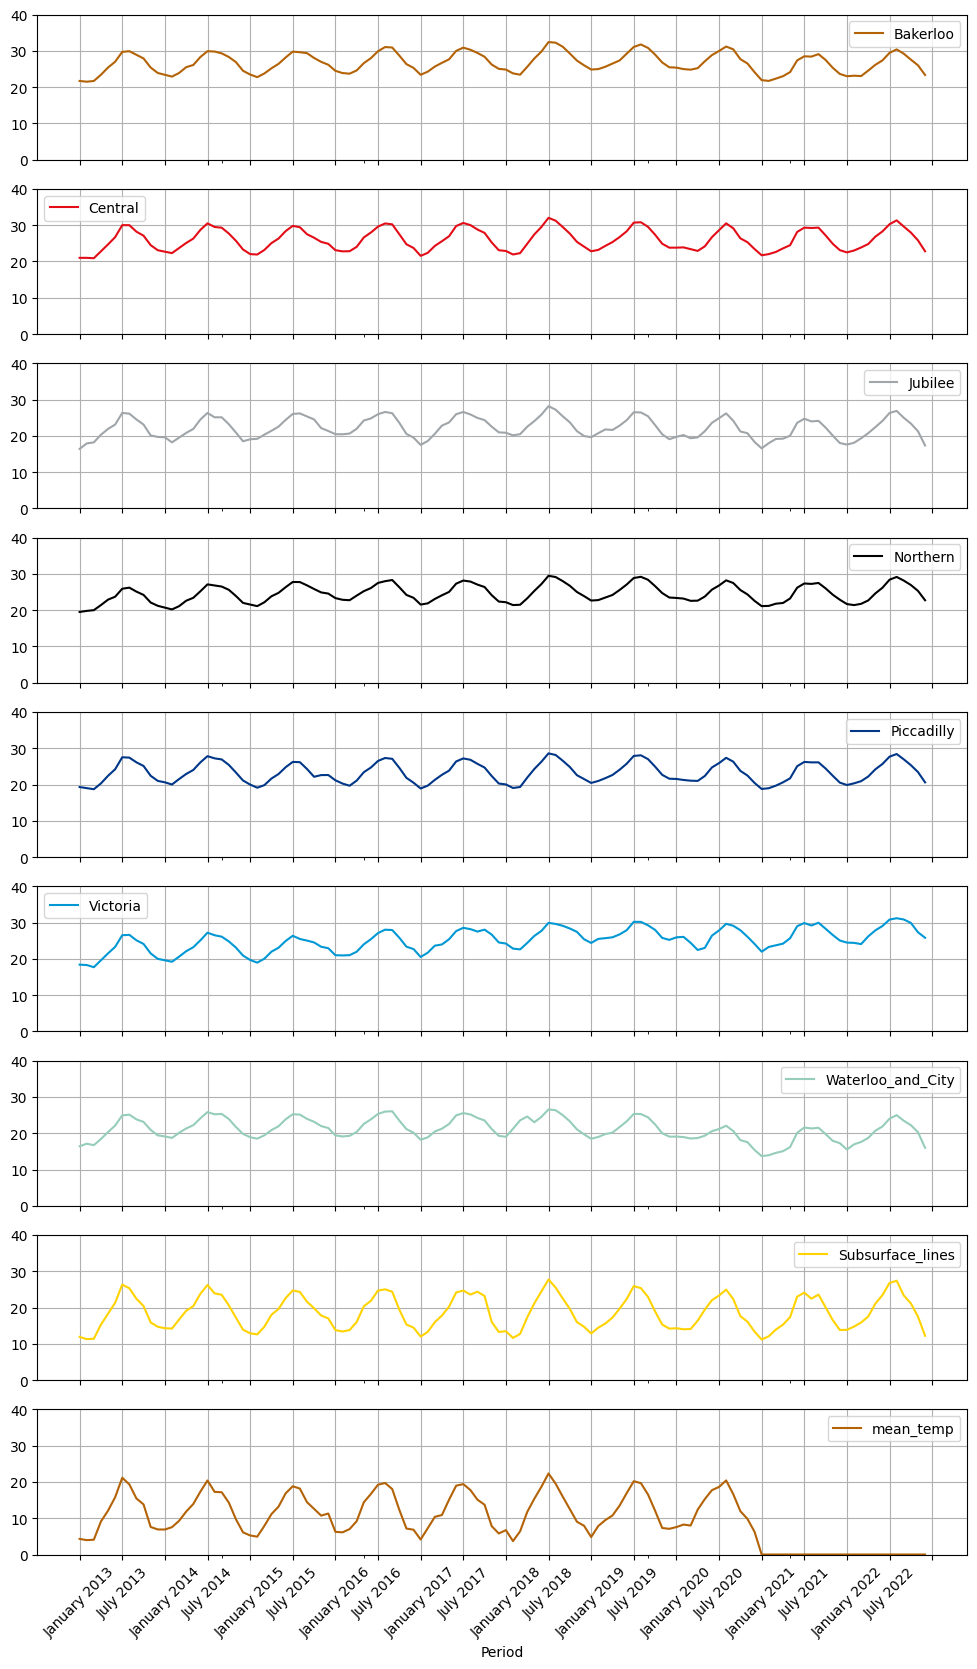

In [291]:
# plot multiple columns such as population and year from dataframe
colors = [(0.701, 0.384, 0.019), 
          (0.890, 0.051, 0.090),
          (0.627, 0.647, 0.662),
          (0.0, 0.0, 0.0),
          (0.0, 0.211, 0.533),
          (0.0, 0.596, 0.831),
          (0.584, 0.803, 0.729),
          (1.0, 0.827, 0.0)
         ] # Setting the colormap for all underground lines

df_merged.plot(x="Period", y=["Bakerloo",
                              "Central",
                              "Jubilee",
                              "Northern", 
                              "Piccadilly",
                              "Victoria", 
                              "Waterloo_and_City",
                              "Subsurface_lines", 
                              "mean_temp"],
               grid=True,
               subplots=True,
               kind="line",
               ylim=(0, 40),
               figsize=(12, 20),
               rot=45,
               stacked=True,
               xticks=[x * 6 for x in range(21)], # Setting the x ticks to be periodic 
               color=colors
              );

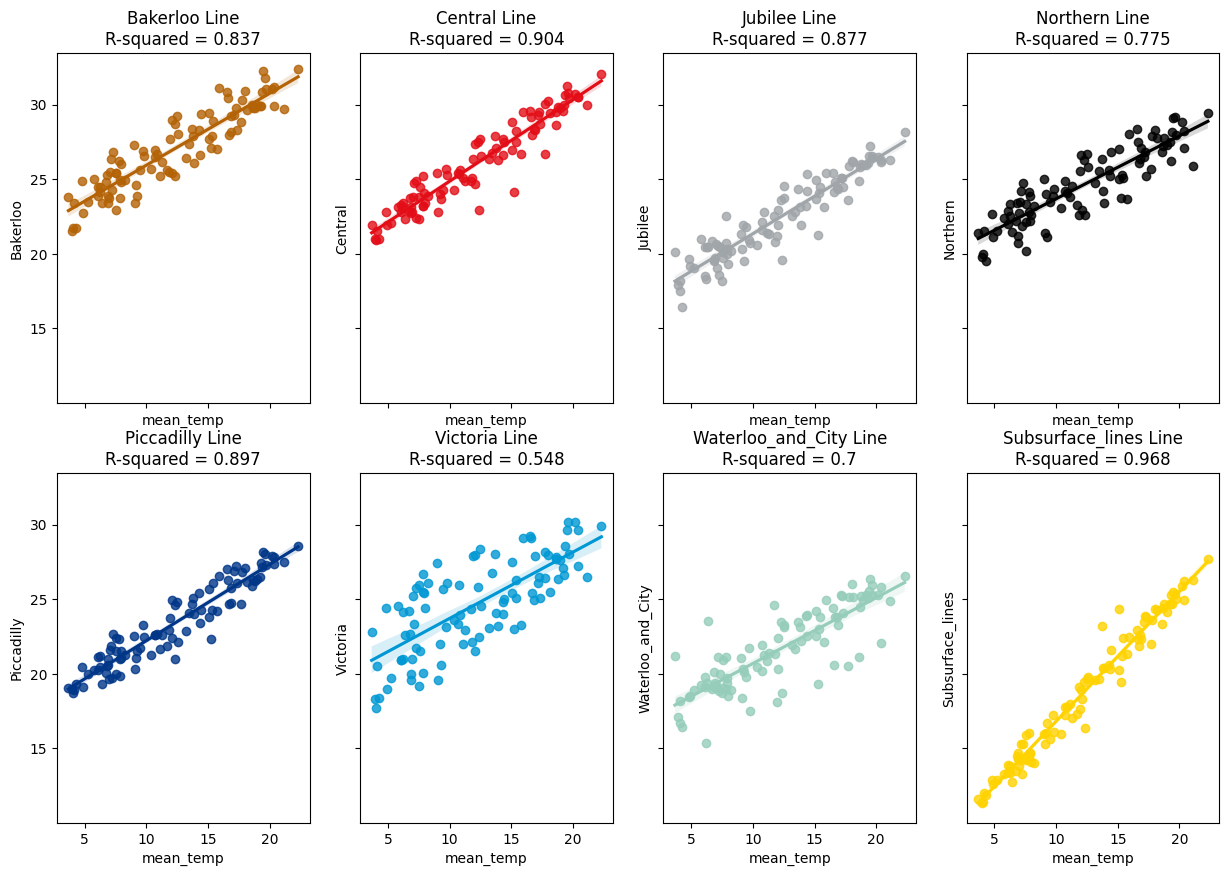

In [292]:
y=["Bakerloo",
   "Central",
   "Jubilee",
   "Northern", 
   "Piccadilly",
   "Victoria", 
   "Waterloo_and_City",
   "Subsurface_lines"] 
colors = [(0.701, 0.384, 0.019), 
          (0.890, 0.051, 0.090),
          (0.627, 0.647, 0.662),
          (0.0, 0.0, 0.0),
          (0.0, 0.211, 0.533),
          (0.0, 0.596, 0.831),
          (0.584, 0.803, 0.729),
          (1.0, 0.827, 0.0)] # All the underground TfL lines and their associated colour scheme
    
fig, ax = plt.subplots(nrows=2, 
                       ncols=4,
                       sharex=True,
                       sharey=True,
                       figsize=(15,10)) # Makes cool subplots
for i in range(8):
    row = i // 4 # Assigns the row of the plots by floor division
    col = i % 4 # Assigns the column of the plots by modulo
    sns.regplot(df_merged, #I decided to drop 2020 entirely, due to inconsistent trends in the data
                x="mean_temp",
                y=y[i], 
                color=colors[i],
                ax=ax[row][col])
    ax[row][col].set_title(y[i] + " Line\n" + "R-squared = " + str(round(df_merged.corr(numeric_only=True).loc["mean_temp",y[i]]**2, 3)))
    # Writes the r-squared value for each plot, rounded to 3 decimal places

In [293]:
data = {
    'LINE': ['BAKERLOO', 'CENTRAL', 'JUBILEE', 'NORTHERN', 'PICCADILLY', 'VICTORIA', 'WATERLOO & CITY'],
    'R-SQUARED': [0.837, 0.904, 0.877, 0.775, 0.897, 0.548, 0.7]
}

df5 = pd.DataFrame(data)
df5

,LINE,R-SQUARED
0,BAKERLOO,0.837
1,CENTRAL,0.904
2,JUBILEE,0.877
3,NORTHERN,0.775
4,PICCADILLY,0.897
5,VICTORIA,0.548
6,WATERLOO & CITY,0.700


### Observations
As we can see from the plots, the ambient temperature in London is generally predictive of the temperature on different TfL Underground lines. However, how predictive it is varies for each line.
* The Subsurface Lines have an R-squared number of 0.968. These lines are air-conditioned with [very specific thermostat settings](https://tfl.gov.uk/corporate/transparency/freedom-of-information/foi-request-detail?referenceId=FOI-0659-1920) which would explain the strong correlation.
* Most lines are generally within 0.7 to 0.95 with variation from the ambient (how much hotter the tube is than ambient) between 2 and 14˚C. 
* The most erratic line is the Victoria line only registering an R-squared number of 0.548. It has been very challenging to find any data or reasonable explanations for the trends exhibited by the Victoria line data. It has the newest stock of any line besides the Subsurface lines and is equipped with regenerative braking. As of 2019, the line also became the 2nd hottest line on the Underground network. As mentioned earlier, it is possible that the fact it is the only wholly-undergound line could be a factor but without further data or context, it is hard to ascertain what causes this.

In [294]:
data = {
    'LINE': ['BAKERLOO', 'CIRCLE', 'CENTRAL', 'DISTRICT', 'DISTRICT (NR)', 'HAMMERSMITH & CITY',
             'JUBILEE', 'METROPOLITAN', 'NORTHERN', 'PICCADILLY', 'VICTORIA', 'WATERLOO & CITY'],
    'TOTAL_BELOW_LENGTH_KM': [23772, 100000, 53190.5, 39933.5, 0, 19235.3, 42124.9, 7731.9, 90391, 61022.9, 46936, 4687],
    'TOTAL_LENGTH_KM': [24028.1, 100000, 152228.5, 128298.7, 8916.9, 30177.2, 80435.3, 156275, 129272.1, 131849, 46936, 4687],
    'PERCENTAGE': [98.9, 100, 34.9, 31.1, 0, 63.7, 52.4, 4.9, 69.9, 46.3, 100, 100]
}

df4 = pd.DataFrame(data)
lines_to_remove = ['BAKERLOO', 'CIRCLE', 'DISTRICT', 'DISTRICT (NR)', 'HAMMERSMITH & CITY', 'METROPOLITAN']
df4 = df4[~df4['LINE'].isin(lines_to_remove)]
df4


,LINE,TOTAL_BELOW_LENGTH_KM,TOTAL_LENGTH_KM,PERCENTAGE
2,CENTRAL,53190.5,152228.5,34.9
6,JUBILEE,42124.9,80435.3,52.4
8,NORTHERN,90391.0,129272.1,69.9
9,PICCADILLY,61022.9,131849.0,46.3
10,VICTORIA,46936.0,46936.0,100.0
11,WATERLOO & CITY,4687.0,4687.0,100.0


In [295]:
df6 = pd.merge(df4, df5,
         on='LINE',
         how='inner')

In [296]:
colors = [(0.701, 0.384, 0.019), 
          (0.890, 0.051, 0.090),
          (0.627, 0.647, 0.662),
          (0.0, 0.0, 0.0),
          (0.0, 0.211, 0.533),
          (0.0, 0.596, 0.831),
          (0.584, 0.803, 0.729)]

px.scatter(df6, 
           'R-SQUARED', 
           'PERCENTAGE',
           hover_name='LINE',
           trendline='ols')

In [297]:
# Using statsmodels we can find the parameters of the correlations we created.
import statsmodels.formula.api as smf
y=["Bakerloo",
   "Central",
   "Jubilee",
   "Northern", 
   "Piccadilly",
   "Victoria", 
   "Waterloo_and_City",
   "Subsurface_lines"] 

for i in range(8):
    print(y[i] + " Line")
    y[i] = smf.ols(formula = f"{y[i]} ~ mean_temp", data=df_merged).fit()
    print(y[i].params)
    print(' ')
    

Bakerloo Line
Intercept    21.116709
mean_temp     0.481691
dtype: float64
 
Central Line
Intercept    19.392019
mean_temp     0.546762
dtype: float64
 
Jubilee Line
Intercept    16.310651
mean_temp     0.502946
dtype: float64
 
Northern Line
Intercept    19.464919
mean_temp     0.421984
dtype: float64
 
Piccadilly Line
Intercept    17.097340
mean_temp     0.511716
dtype: float64
 
Victoria Line
Intercept    19.262670
mean_temp     0.444545
dtype: float64
 
Waterloo_and_City Line
Intercept    16.274327
mean_temp     0.441093
dtype: float64
 
Subsurface_lines Line
Intercept    8.096067
mean_temp    0.871229
dtype: float64
 


Above, we have the parameters of the correlation lines we created. Here is what the parameters represent:
- The intercept represents what the temperature of each carriage would be should the ambient temperature be 0˚C. For example, the Bakerloo line has an intercept of 21.12˚C. This suggests the carriage temperature would be 21.12˚C when the ambient temperature is 0˚C.
- The gradient (called mean_temp here) is representative of how much change in ambient temperature affects carriage temperature. For example, The Jubilee line has a gradient of 0.503. This suggests that 1˚ increase in ambient temperature leads to 0.503˚ increase in carrriage temperature.

### Conclusion
An article published by [Rail Engineering](https://assets.markallengroup.com//article-images/23757/cooling.pdf) gave detail of computer modelling run on the Victoria line and found the major heat sources and sinks as follows:

| Heat source	                 |%   | Heat Sinks         |%   |
| -------------------------------|----|--------------------|----|
| Braking losses	             |38% | Tunnel Walls       |79% |
| Mechanical losses              |22% | Tunnels            |11% |
| Drive losses	                 |16% | Ventilation Shafts |10% |
| Train auxiliaries	             |13% |                    |-   |
| Tunnel systems	             |4%  |                    |-   |
| Station systems and passengers |4%  |                    |-   |
| Train passengers	             |3%  |                    |-   |

That puts _89%_ of all heated generated in tube systems on the train itelf. The article also goes on to suggest that the root of the problem is that the biggest heat sink is failing as the temperature behind the walls rises into the clay, storing the heat. The issue of cooling the tube is so complex that the former mayor of London, Ken Livingstone, offered a prize of __£100,000__ to anyone who could put forward a viable solution. After several years of the reward being on offer, TfL announced that *[none of the 3,500 submissions were suitable.](https://www.standard.co.uk/hp/front/aps100-000-prize-for-cooling-tube-goes-unclaimed-7204222.html)* 
   
18 years on from then, temperatures have only risen and it is deeply worrying that the high temperatures have led to further medical emergencies on the underground. As of today, the current stock of TfL trains is as follows:

| TfL Underground line | Operating Stock  | Regenerative Braking           | Air-Conditioning  | Planned Restock?    |
| :------------------  | :--------------: |--------------------------------|  :--------------: |---------------------|
| __Bakerloo__         | 1972 Stock       | No - Stock pre-dates technology| No                | Yes - No timeline*  |
| __Central__          | 1992 Stock       | Yes - 790VDC                   | No                | Yes - No timeline*  |
| __Jubilee__          | 1996 Stock       | Yes - 790VDC**                 | No                | None                |
| __Northern__         | 1995 Stock       | Yes - 790VDC                   | No                | None                |
| __Piccadilly__       | 1973 Stock       | No - Stock pre-dates technology| No                | Yes - Expected 2025 |
| __Victoria__         | 2009 Stock       | Yes - 890VDC                   | No                | None                |
| __Waterloo & City__  | 1992 Stock       | Yes - 790VDC                   | No                | Yes - No timeline*  |
| __SubSurface Lines__***| S7/S8 (2012-2014)| Yes - 650/790/890 VDC****   | Yes               | None                |
Sources:
[FOI-2080-2021](https://tfl.gov.uk/corporate/transparency/freedom-of-information/foi-request-detail?referenceId=FOI-2080-2021)
[Piccadilly Upgrade](https://tfl.gov.uk/travel-information/improvements-and-projects/piccadilly-line-upgrade)
[New Tube for London](https://tfl.gov.uk/info-for/media/press-releases/2014/october/design-for-the-new-tube-for-london-revealed)

|Notes: |
|:------:|
|*All to be restocked under the New Tube for London project, no up-to-date timeline. |
|**Soon to be upgraded to 890VDC, to be more in line with the Victoria line
|***Subsurface Lines include the Circle, District, Metropolitan and Hammersmith & City lines.|
|****Depends on location of the train and other assets operating in those areas.|


TfL is in the early stages of upgrading the Piccadilly, Bakerloo, Central and Waterloo & City lines under the New Tube for London project. All these lines are expected to be stocked with the [Siemens Mobility 'InspiroLondon'](https://www.mobility.siemens.com/global/en/portfolio/references/metro-london.html) trains. 

The Piccadilly line will be the first to see upgrades and is expected to have [new trains installed by 2025](https://tfl.gov.uk/info-for/media/press-releases/2021/march/tfl-and-siemens-mobility-unveil-detailed-design-of-new-piccadilly-line-trains) to serve the public, although this is already well behind schedule.

The Bakerloo line, which [operates the oldest train stock in the nation](https://www.mylondon.news/news/zone-1-news/london-underground-trains-officially-oldest-20672857) is expected to have new trains ordered in the financial year 2023/24. This, ignoring the potential for delays or setbacks, would mean that new trains would not be installed until the mid-2030s. This also goes for the notoriously busy Central line. These two lines have routinely ranked as the hottest lines on the tube network and will potentially be without stock upgrades for at least the next decade. 

Without proper monitoring and mitigation measures, it is very likely this could lead to further exacerbation of these issues, putting passengers and train performance at risk. Realistically, there is only so much that can be done with the TfL Network still reeling from the effects of the COVID-19 pandemic as it seeks to post an operating surplus for the financial year 2022/23.

To learn more about the TfL undergound rolling train stock, [see this document](https://www.whatdotheyknow.com/request/239641/response/590412/attach/3/RS%20Info%20Sheets%204%20Edition.pdf)

Thank you for your interest in this project! Check out what I'm working on next on [GitHub](https://github.com/Osakwe1)